# Bibliotecas

In [61]:
import pandas as pd
import numpy as np

import locale
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Importando os dados

In [62]:
url_dados_clima = 'https://github.com/jeantorre/projeto_aplicado_MBA/blob/main/documents/dados_A652_D_2014-01-01_2024-01-31.csv?raw=true'
url_dados_dengue = 'https://github.com/jeantorre/projeto_aplicado_MBA/blob/main/documents/sinannet_cnv_denguebrj162338189_49_85_220.csv?raw=true'

df_clima = pd.read_csv(url_dados_clima, sep = ';', decimal = ',', skiprows = 10)
df_dengue = pd.read_csv(url_dados_dengue, sep = ';', skiprows = 3, encoding = 'ISO-8859-1')

In [63]:
df_clima.head(5)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 11
0,2014-01-01,0.2,1004.895833,23.362500,34.2,29.825000,26.1,68.791667,55.0,7.2,1.908333,NaN
1,2014-01-02,0.0,1004.695833,22.633333,33.4,28.804167,24.7,69.916667,52.0,11.5,2.841667,NaN
2,2014-01-03,0.0,1004.341667,24.212500,32.9,29.416667,26.9,73.916667,62.0,8.0,1.879167,NaN
3,2014-01-04,0.0,1008.666667,24.816667,31.9,28.975000,26.7,78.666667,60.0,12.6,3.383333,NaN
4,2014-01-05,0.0,1011.470833,23.087500,34.4,28.187500,24.7,74.833333,55.0,7.9,4.500000,NaN


In [64]:
df_dengue.head(5)

,Mês notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,Janeiro,-,1504.0,2530.0,16669.0,1513.0,1112.0,1419.0,1011.0,75.0,78.0,1324.0,26095,53330.0
1,Fevereiro,-,1018.0,3332.0,16497.0,1372.0,1520.0,1193.0,1010.0,158.0,236.0,2835.0,49630,78801.0
2,Marco,-,816.0,9687.0,17427.0,1638.0,2656.0,2949.0,870.0,334.0,913.0,6657.0,-,43947.0
3,Abril,-,775.0,14245.0,18464.0,1314.0,2967.0,7295.0,499.0,644.0,1701.0,7673.0,-,55577.0
4,Maio,-,807.0,14702.0,10260.0,1424.0,2042.0,10303.0,300.0,457.0,3066.0,7856.0,-,51217.0


## Limpeza dados Dengue

In [65]:
df_dengue

,Mês notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,Janeiro,-,1504.0,2530.0,16669.0,1513.0,1112.0,1419.0,1011.0,75.0,78.0,1324.0,26095,53330.0
1,Fevereiro,-,1018.0,3332.0,16497.0,1372.0,1520.0,1193.0,1010.0,158.0,236.0,2835.0,49630,78801.0
2,Marco,-,816.0,9687.0,17427.0,1638.0,2656.0,2949.0,870.0,334.0,913.0,6657.0,-,43947.0
3,Abril,-,775.0,14245.0,18464.0,1314.0,2967.0,7295.0,499.0,644.0,1701.0,7673.0,-,55577.0
4,Maio,-,807.0,14702.0,10260.0,1424.0,2042.0,10303.0,300.0,457.0,3066.0,7856.0,-,51217.0
5,Junho,-,557.0,8415.0,3662.0,833.0,1139.0,4423.0,157.0,382.0,1765.0,5263.0,-,26596.0
6,Julho,-,407.0,3885.0,1934.0,602.0,941.0,1965.0,154.0,229.0,901.0,2742.0,-,13760.0
7,Agosto,-,382.0,2933.0,885.0,434.0,583.0,751.0,118.0,167.0,603.0,2303.0,-,9159.0
8,Setembro,-,381.0,1842.0,565.0,336.0,329.0,539.0,111.0,113.0,376.0,1497.0,-,6089.0
9,Outubro,-,467.0,1521.0,487.0,447.0,405.0,416.0,110.0,68.0,450.0,1764.0,-,6135.0


In [66]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mês notificação  38 non-null     object 
 1   2013             13 non-null     object 
 2   2014             13 non-null     float64
 3   2015             13 non-null     float64
 4   2016             13 non-null     float64
 5   2017             13 non-null     float64
 6   2018             13 non-null     float64
 7   2019             13 non-null     float64
 8   2020             13 non-null     float64
 9   2021             13 non-null     float64
 10  2022             13 non-null     float64
 11  2023             13 non-null     float64
 12  2024             13 non-null     object 
 13  Total            13 non-null     float64
dtypes: float64(11), object(3)
memory usage: 4.3+ KB


In [67]:
df_dengue_tratado = df_dengue.iloc[:12, :]

In [68]:
df_dengue_tratado = df_dengue_tratado.drop(columns = ['2013', 'Total'])

In [69]:
df_dengue_tratado['2024'] = pd.to_numeric(df_dengue_tratado['2024'], errors = 'coerce')

In [70]:
df_dengue_tratado

,Mês notificação,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Janeiro,1504.0,2530.0,16669.0,1513.0,1112.0,1419.0,1011.0,75.0,78.0,1324.0,26095.0
1,Fevereiro,1018.0,3332.0,16497.0,1372.0,1520.0,1193.0,1010.0,158.0,236.0,2835.0,49630.0
2,Marco,816.0,9687.0,17427.0,1638.0,2656.0,2949.0,870.0,334.0,913.0,6657.0,NaN
3,Abril,775.0,14245.0,18464.0,1314.0,2967.0,7295.0,499.0,644.0,1701.0,7673.0,NaN
4,Maio,807.0,14702.0,10260.0,1424.0,2042.0,10303.0,300.0,457.0,3066.0,7856.0,NaN
5,Junho,557.0,8415.0,3662.0,833.0,1139.0,4423.0,157.0,382.0,1765.0,5263.0,NaN
6,Julho,407.0,3885.0,1934.0,602.0,941.0,1965.0,154.0,229.0,901.0,2742.0,NaN
7,Agosto,382.0,2933.0,885.0,434.0,583.0,751.0,118.0,167.0,603.0,2303.0,NaN
8,Setembro,381.0,1842.0,565.0,336.0,329.0,539.0,111.0,113.0,376.0,1497.0,NaN
9,Outubro,467.0,1521.0,487.0,447.0,405.0,416.0,110.0,68.0,450.0,1764.0,NaN


In [71]:
df_dengue_tratado.at[1, '2024'] = np.nan

In [72]:
ano = '2014'
df = df_dengue_tratado[['Mês notificação', '2014']]

In [73]:
df['Periodo'] = df['Mês notificação'] + f'/{ano}'
df['Quantidade'] = df[ano]
df.drop(columns = ['Mês notificação', ano], inplace = True)

In [74]:
df

,Periodo,Quantidade
0,Janeiro/2014,1504.0
1,Fevereiro/2014,1018.0
2,Marco/2014,816.0
3,Abril/2014,775.0
4,Maio/2014,807.0
5,Junho/2014,557.0
6,Julho/2014,407.0
7,Agosto/2014,382.0
8,Setembro/2014,381.0
9,Outubro/2014,467.0


In [75]:
anos = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
lista_df = []
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

for ano in anos:
    df = df_dengue_tratado[['Mês notificação', ano]]
    meses = df['Mês notificação'].values
    meses_renomeados = ['Março' if mes == 'Marco' else mes for mes in meses]
    df['Mês notificação'] = meses_renomeados
    df['Periodo'] = df['Mês notificação'] + f'/{ano}'
    df['Periodo'] = pd.to_datetime(df['Periodo'], format = '%B/%Y', errors = 'coerce')
    df['Quantidade de Notificações de Dengue'] = df[ano]
    df.drop(columns = ['Mês notificação', ano], inplace = True)
    lista_df.append(df)

In [76]:
df_dengue_tratado = pd.DataFrame()

for df in lista_df:
    df_dengue_tratado = pd.concat([df_dengue_tratado, df], ignore_index = True)

df_dengue_tratado.dropna(inplace = True)

In [77]:
print(df_dengue_tratado.info())

df_dengue_tratado

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Periodo                               121 non-null    datetime64[ns]
 1   Quantidade de Notificações de Dengue  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
None


,Periodo,Quantidade de Notificações de Dengue
0,2014-01-01,1504.0
1,2014-02-01,1018.0
2,2014-03-01,816.0
3,2014-04-01,775.0
4,2014-05-01,807.0
...,...,...
116,2023-09-01,1497.0
117,2023-10-01,1764.0
118,2023-11-01,3072.0
119,2023-12-01,7266.0


## Limpeza dados climáticos

In [78]:
df_clima.tail(5)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 11
3678,2024-01-27,1.2,1008.287500,22.966667,27.9,24.570833,22.1,90.708333,80.0,7.8,1.945833,NaN
3679,2024-01-28,0.4,1009.375000,23.058333,28.4,24.850000,23.9,89.958333,82.0,17.5,1.916667,NaN
3680,2024-01-29,15.8,1008.816667,23.350000,30.5,25.562500,21.9,87.750000,75.0,9.0,2.391667,NaN
3681,2024-01-30,0.2,1007.333333,25.195833,32.3,27.258333,24.8,88.875000,72.0,7.1,2.204167,NaN
3682,2024-01-31,0.0,1008.516667,24.883333,31.6,26.825000,25.5,89.500000,74.0,13.3,1.541667,NaN


In [79]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data Medicao                                            3683 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                    3637 non-null   float64
 2   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)              3651 non-null   float64
 3   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  3476 non-null   float64
 4   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                    3654 non-null   float64
 5   TEMPERATURA MEDIA, DIARIA (AUT)(°C)                     3643 non-null   float64
 6   TEMPERATURA MINIMA, DIARIA (AUT)(°C)                    3654 non-null   float64
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)           3537 non-null   float64
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA 

In [80]:
df_clima.columns

Index(['Data Medicao', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
       'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
       'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
       'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
       'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', 'Unnamed: 11'],
      dtype='object')

In [81]:
df_clima_tratado = df_clima.drop(columns = ['UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)', 'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
                         'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', 'Unnamed: 11', 'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)', 'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)'])

In [82]:
df_clima_tratado['Data Medicao'] = pd.to_datetime(df_clima['Data Medicao'], errors = 'coerce')

In [83]:
df_clima_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Data Medicao                                   3683 non-null   datetime64[ns]
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           3637 non-null   float64       
 2   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)           3654 non-null   float64       
 3   TEMPERATURA MEDIA, DIARIA (AUT)(°C)            3643 non-null   float64       
 4   TEMPERATURA MINIMA, DIARIA (AUT)(°C)           3654 non-null   float64       
 5   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  3537 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 172.8 KB


In [84]:
media_precipitacao = df_clima_tratado.groupby(df_clima_tratado['Data Medicao'].dt.to_period('M'))['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'].mean()
media_temperatura_media = df_clima_tratado.groupby(df_clima_tratado['Data Medicao'].dt.to_period('M'))['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean()
media_temperatura_maxima = df_clima_tratado.groupby(df_clima_tratado['Data Medicao'].dt.to_period('M'))['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].mean()
media_temperatura_minima = df_clima_tratado.groupby(df_clima_tratado['Data Medicao'].dt.to_period('M'))['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'].mean()
media_umidade_relativa = df_clima_tratado.groupby(df_clima_tratado['Data Medicao'].dt.to_period('M'))['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].mean()

In [85]:
print(media_temperatura_media)
print(media_temperatura_maxima)
print(media_temperatura_minima)

Data Medicao
2014-01    26.860618
2014-02    24.910565
2014-03    25.109140
2014-04    23.528611
2014-05    22.770296
             ...    
2023-09    23.892832
2023-10    23.470833
2023-11    24.992917
2023-12    25.340825
2024-01    26.003629
Freq: M, Name: TEMPERATURA MEDIA, DIARIA (AUT)(°C), Length: 121, dtype: float64
Data Medicao
2014-01    31.970968
2014-02    30.060714
2014-03    29.625806
2014-04    27.590000
2014-05    26.500000
             ...    
2023-09    28.690000
2023-10    27.241935
2023-11    29.173333
2023-12    30.096774
2024-01    30.067742
Freq: M, Name: TEMPERATURA MAXIMA, DIARIA (AUT)(°C), Length: 121, dtype: float64
Data Medicao
2014-01    23.632258
2014-02    21.342857
2014-03    22.503226
2014-04    21.553333
2014-05    20.661290
             ...    
2023-09    21.493333
2023-10    21.548387
2023-11    22.683333
2023-12    22.654839
2024-01    23.612903
Freq: M, Name: TEMPERATURA MINIMA, DIARIA (AUT)(°C), Length: 121, dtype: float64


In [86]:
df_clima_tratado['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'] = df_clima_tratado['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'].fillna(df_clima_tratado['Data Medicao'].dt.to_period('M').map(media_precipitacao))
df_clima_tratado['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] = df_clima_tratado['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].fillna(df_clima_tratado['Data Medicao'].dt.to_period('M').map(media_temperatura_media))
df_clima_tratado['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'] = df_clima_tratado['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].fillna(df_clima_tratado['Data Medicao'].dt.to_period('M').map(media_temperatura_maxima))
df_clima_tratado['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'] = df_clima_tratado['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'].fillna(df_clima_tratado['Data Medicao'].dt.to_period('M').map(media_temperatura_minima))
df_clima_tratado['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'] = df_clima_tratado['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].fillna(df_clima_tratado['Data Medicao'].dt.to_period('M').map(media_umidade_relativa))

In [87]:
df_clima_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Data Medicao                                   3683 non-null   datetime64[ns]
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           3683 non-null   float64       
 2   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)           3683 non-null   float64       
 3   TEMPERATURA MEDIA, DIARIA (AUT)(°C)            3683 non-null   float64       
 4   TEMPERATURA MINIMA, DIARIA (AUT)(°C)           3683 non-null   float64       
 5   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  3622 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 172.8 KB


In [88]:
df_clima_tratado[df_clima_tratado['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].isna()]

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)"
3560,2023-10-01,11.8,24.1,21.816667,20.2,NaN
3561,2023-10-02,7.8,23.5,21.475000,20.0,NaN
3562,2023-10-03,7.2,25.8,21.629167,19.1,NaN
3563,2023-10-04,0.0,27.0,23.379167,20.4,NaN
3564,2023-10-05,0.0,27.1,23.850000,22.5,NaN
...,...,...,...,...,...,...
3616,2023-11-26,0.0,26.0,22.825000,20.9,NaN
3617,2023-11-27,0.0,29.7,24.245833,22.6,NaN
3618,2023-11-28,0.0,27.4,24.345833,22.7,NaN
3619,2023-11-29,3.2,30.4,25.283333,21.2,NaN


In [89]:
df_clima_tratado['Mês'] = pd.DatetimeIndex(df_clima_tratado['Data Medicao']).month
df_clima_tratado['Ano'] = pd.DatetimeIndex(df_clima_tratado['Data Medicao']).year

In [90]:
df_clima_tratado_2022 = df_clima_tratado[df_clima_tratado['Ano'] == 2022]
media_umidade_2022 = df_clima_tratado_2022.groupby('Mês')['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].mean()

In [91]:
media_umidade_outubro = media_umidade_2022[10]
media_umidade_novembro = media_umidade_2022[11]

In [92]:
df_clima_tratado[(df_clima_tratado['Ano'] == 2023) & (df_clima_tratado['Mês'] == 10)] = df_clima_tratado[(df_clima_tratado['Ano'] == 2023) & (df_clima_tratado['Mês'] == 10)].fillna(media_umidade_outubro)
df_clima_tratado[(df_clima_tratado['Ano'] == 2023) & (df_clima_tratado['Mês'] == 11)] = df_clima_tratado[(df_clima_tratado['Ano'] == 2023) & (df_clima_tratado['Mês'] == 11)].fillna(media_umidade_novembro)

In [93]:
df_clima_tratado[df_clima_tratado['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].isna()]

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",Mês,Ano


In [94]:
print(df_clima_tratado.info())

df_clima_tratado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Data Medicao                                   3683 non-null   datetime64[ns]
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           3683 non-null   float64       
 2   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)           3683 non-null   float64       
 3   TEMPERATURA MEDIA, DIARIA (AUT)(°C)            3683 non-null   float64       
 4   TEMPERATURA MINIMA, DIARIA (AUT)(°C)           3683 non-null   float64       
 5   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  3683 non-null   float64       
 6   Mês                                            3683 non-null   int32         
 7   Ano                                            3683 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2)
memory usage: 20

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",Mês,Ano
0,2014-01-01,0.2,34.2,29.825000,26.1,68.791667,1,2014
1,2014-01-02,0.0,33.4,28.804167,24.7,69.916667,1,2014
2,2014-01-03,0.0,32.9,29.416667,26.9,73.916667,1,2014
3,2014-01-04,0.0,31.9,28.975000,26.7,78.666667,1,2014
4,2014-01-05,0.0,34.4,28.187500,24.7,74.833333,1,2014
...,...,...,...,...,...,...,...,...
3678,2024-01-27,1.2,27.9,24.570833,22.1,90.708333,1,2024
3679,2024-01-28,0.4,28.4,24.850000,23.9,89.958333,1,2024
3680,2024-01-29,15.8,30.5,25.562500,21.9,87.750000,1,2024
3681,2024-01-30,0.2,32.3,27.258333,24.8,88.875000,1,2024


## Unificando em um dataframe

In [95]:
colunas = ['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)', 'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)', 'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
           'TEMPERATURA MINIMA, DIARIA (AUT)(°C)', 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)']

In [96]:
coluna = ['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)']


df_completo_clima = df_clima_tratado.groupby(['Ano', 'Mês'])[coluna].sum().reset_index()

In [97]:
colunas = ['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)', 'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
           'TEMPERATURA MINIMA, DIARIA (AUT)(°C)', 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)']

df = pd.DataFrame()
lista_df = []

for coluna in colunas:
    df = df_clima_tratado.groupby(['Ano', 'Mês'])[coluna].mean().reset_index()
    lista_df.append(df)

In [98]:
for df in lista_df:
    df_completo_clima = pd.merge(df_completo_clima, df, on = ['Ano', 'Mês'], how = 'inner')

In [99]:
df_completo_clima

,Ano,Mês,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)"
0,2014,1,49.2,31.970968,26.860618,23.632258,74.188172
1,2014,2,22.2,30.060714,24.910565,21.342857,73.196429
2,2014,3,74.6,29.625806,25.109140,22.503226,77.337366
3,2014,4,122.6,27.590000,23.528611,21.553333,80.497222
4,2014,5,71.2,26.500000,22.770296,20.661290,76.467742
...,...,...,...,...,...,...,...
116,2023,9,23.6,28.690000,23.892832,21.493333,71.080647
117,2023,10,165.6,27.241935,23.470833,21.548387,76.424539
118,2023,11,53.4,29.173333,24.992917,22.683333,73.684722
119,2023,12,28.8,30.096774,25.340825,22.654839,83.773965


In [100]:
df_completo_clima['Periodo'] = pd.to_datetime(df_completo_clima['Ano'].astype(str) + '-' + df_completo_clima['Mês'].astype(str), format = '%Y-%m')

In [101]:
df_completo_clima

,Ano,Mês,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",Periodo
0,2014,1,49.2,31.970968,26.860618,23.632258,74.188172,2014-01-01
1,2014,2,22.2,30.060714,24.910565,21.342857,73.196429,2014-02-01
2,2014,3,74.6,29.625806,25.109140,22.503226,77.337366,2014-03-01
3,2014,4,122.6,27.590000,23.528611,21.553333,80.497222,2014-04-01
4,2014,5,71.2,26.500000,22.770296,20.661290,76.467742,2014-05-01
...,...,...,...,...,...,...,...,...
116,2023,9,23.6,28.690000,23.892832,21.493333,71.080647,2023-09-01
117,2023,10,165.6,27.241935,23.470833,21.548387,76.424539,2023-10-01
118,2023,11,53.4,29.173333,24.992917,22.683333,73.684722,2023-11-01
119,2023,12,28.8,30.096774,25.340825,22.654839,83.773965,2023-12-01


In [102]:
df_completo = pd.merge(df_completo_clima, df_dengue_tratado, on = ['Periodo'], how = 'inner')

In [103]:
df_completo.columns

Index(['Ano', 'Mês', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)', 'Periodo',
       'Quantidade de Notificações de Dengue'],
      dtype='object')

In [104]:
df_completo = df_completo[['Periodo', 'Quantidade de Notificações de Dengue', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
                          'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)', 'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
                          'TEMPERATURA MINIMA, DIARIA (AUT)(°C)', 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)']]

In [105]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Periodo                                        121 non-null    datetime64[ns]
 1   Quantidade de Notificações de Dengue           121 non-null    float64       
 2   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           121 non-null    float64       
 3   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)           121 non-null    float64       
 4   TEMPERATURA MEDIA, DIARIA (AUT)(°C)            121 non-null    float64       
 5   TEMPERATURA MINIMA, DIARIA (AUT)(°C)           121 non-null    float64       
 6   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  121 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.7 KB


In [106]:
df_completo.head(5)

,Periodo,Quantidade de Notificações de Dengue,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)"
0,2014-01-01,1504.0,49.2,31.970968,26.860618,23.632258,74.188172
1,2014-02-01,1018.0,22.2,30.060714,24.910565,21.342857,73.196429
2,2014-03-01,816.0,74.6,29.625806,25.109140,22.503226,77.337366
3,2014-04-01,775.0,122.6,27.590000,23.528611,21.553333,80.497222
4,2014-05-01,807.0,71.2,26.500000,22.770296,20.661290,76.467742


# Análise Exploratória

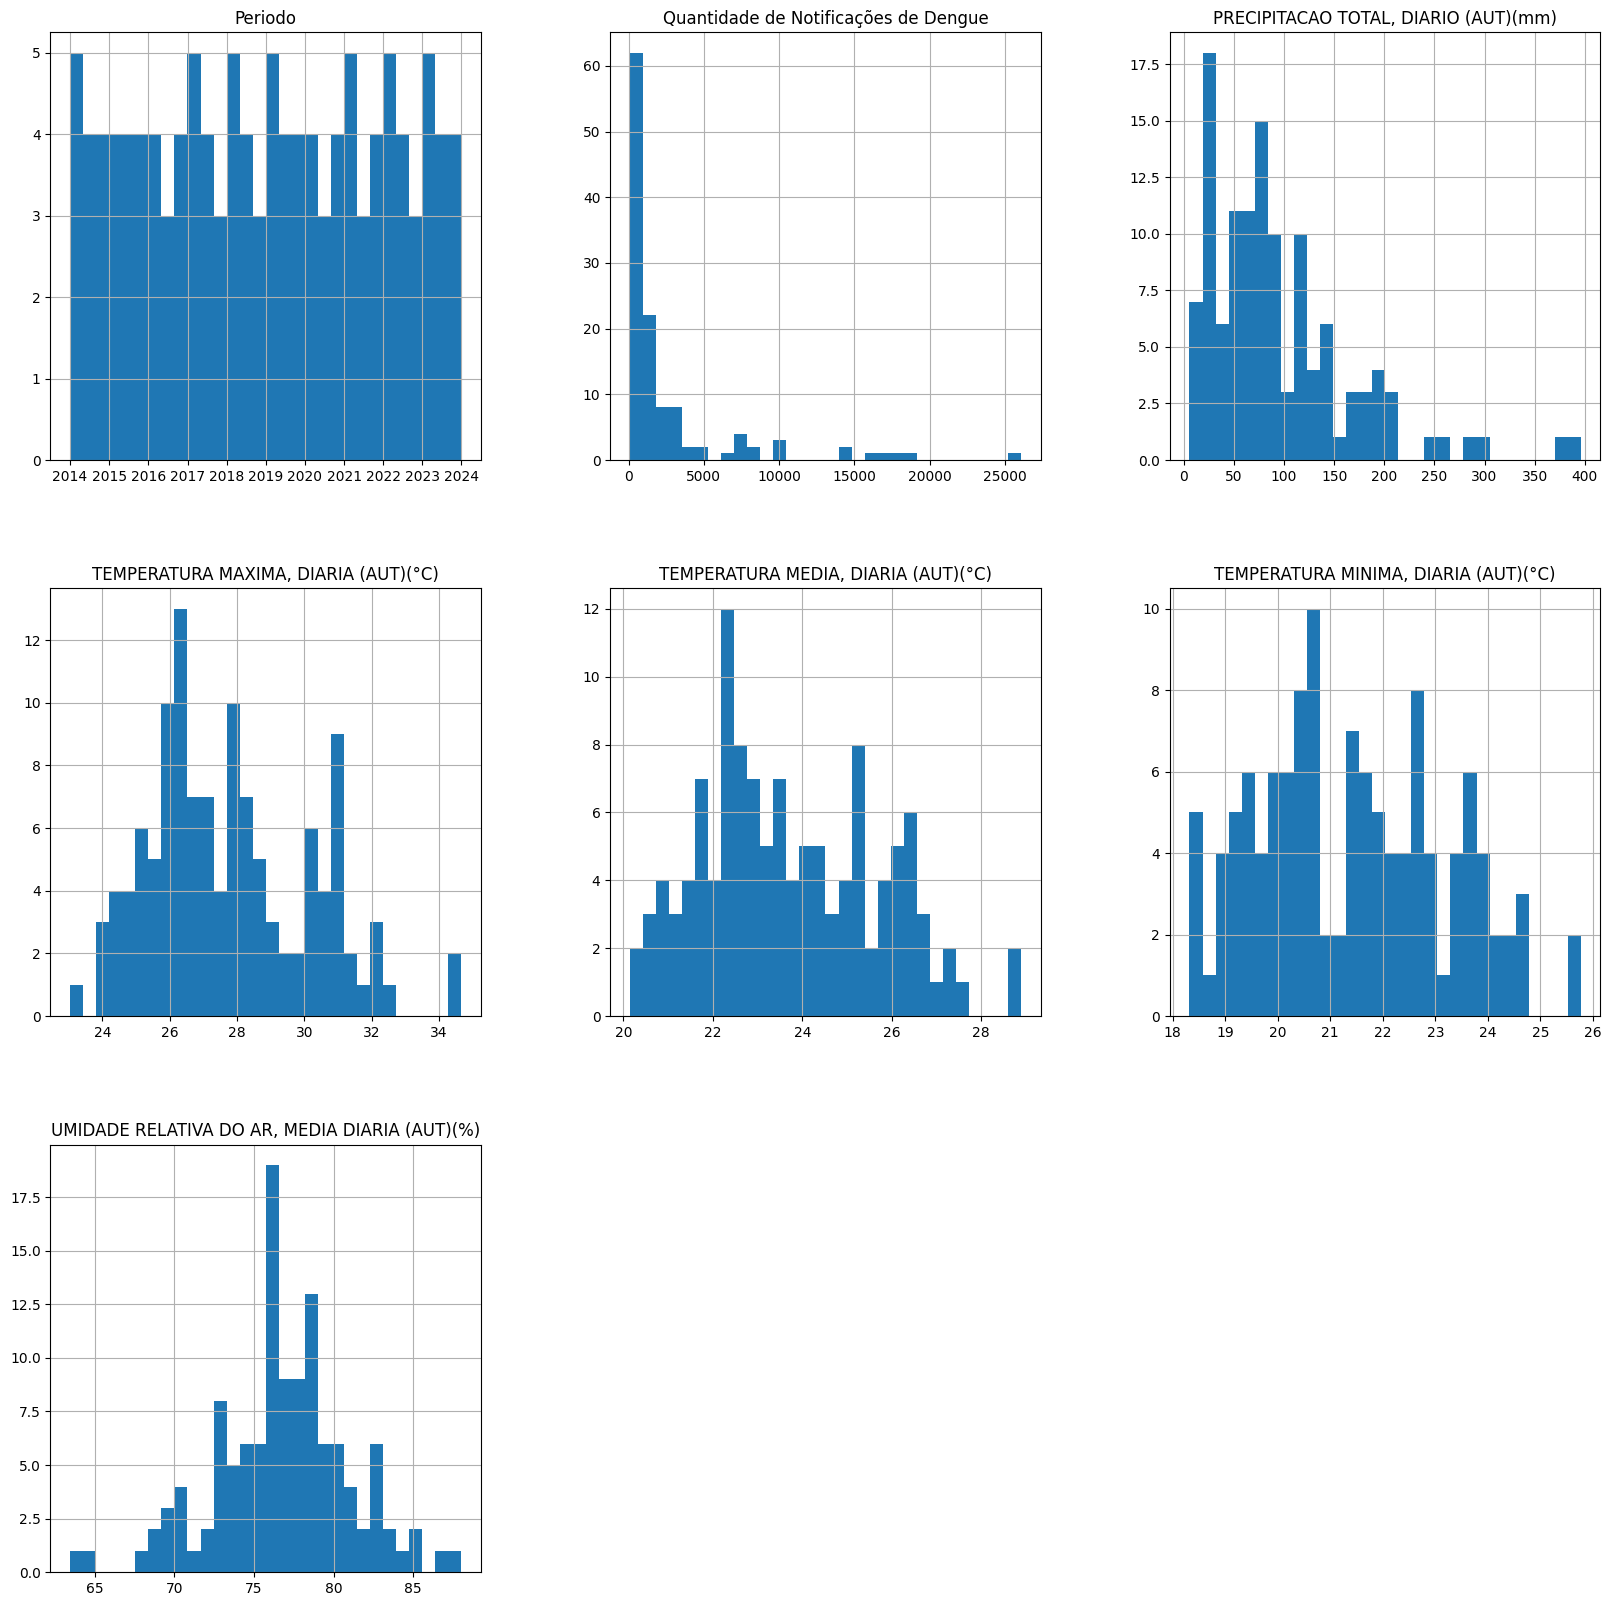

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

df_completo.hist(bins = 30, figsize = (20, 20));

<Axes: >

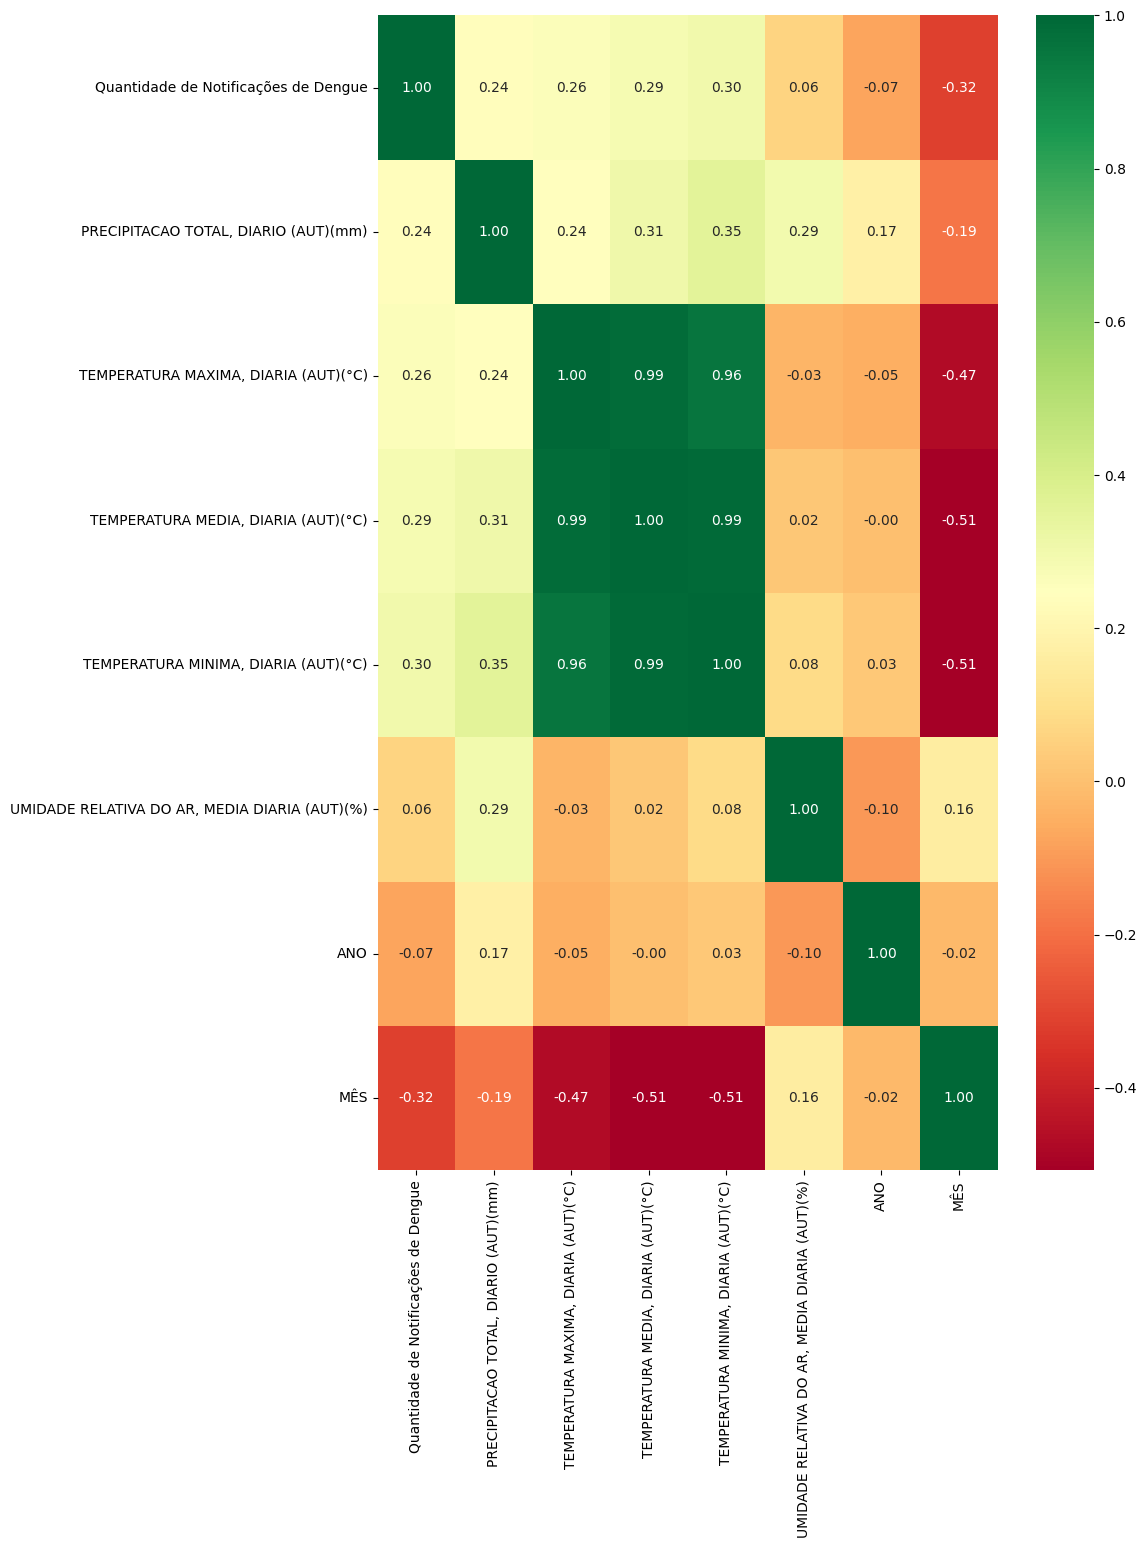

In [131]:
matriz_correlacao = df_completo.select_dtypes(include = ['float', 'int']).corr()
fig, ax = plt.subplots(figsize = (10, 15))

sns.heatmap(matriz_correlacao, annot = True, cmap = "RdYlGn", fmt = '.2f')

In [138]:
df_completo['Quantidade de Notificações de Dengue'].pct_change().tail(1)

120    2.591385
Name: Quantidade de Notificações de Dengue, dtype: float64

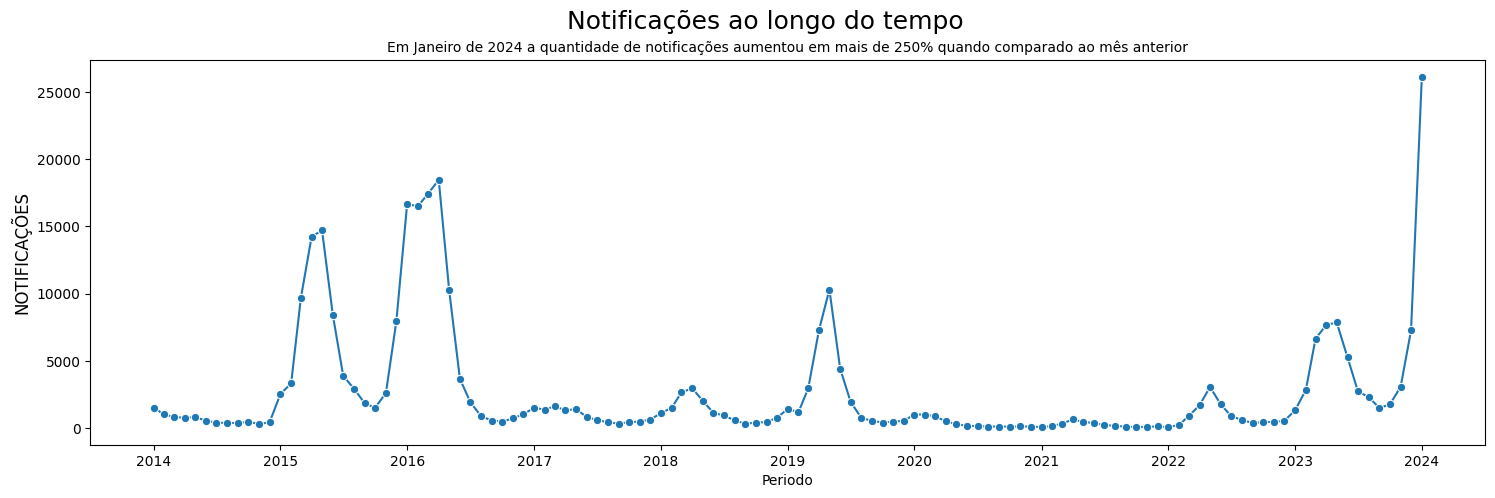

In [142]:
fig, ax = plt.subplots(figsize = (18, 5))
sns.lineplot(df_completo, x = 'Periodo', y = 'Quantidade de Notificações de Dengue', marker = 'o', markersize = 6)
plt.suptitle('Notificações ao longo do tempo', fontsize = 18);
plt.title('Em Janeiro de 2024 a quantidade de notificações aumentou em mais de 250% quando comparado ao mês anterior', fontsize = 10);
ax.set_ylabel('NOTIFICAÇÕES', fontsize = 12);

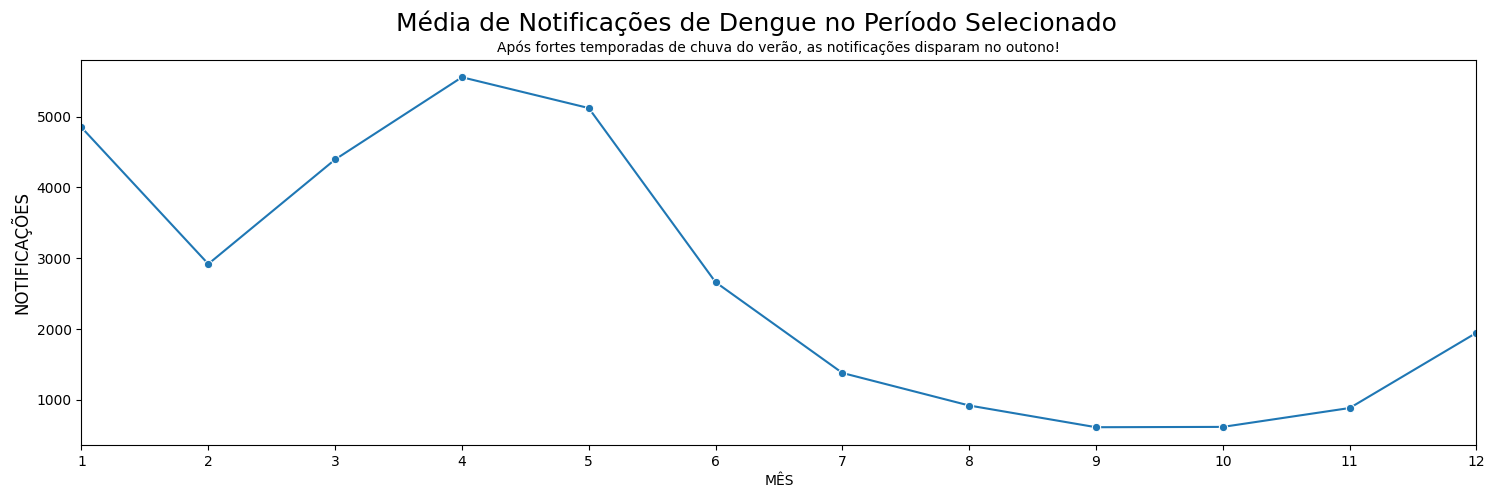

In [130]:
df_completo['ANO'] = pd.DatetimeIndex(df_completo['Periodo']).year
df_completo['MÊS'] = pd.DatetimeIndex(df_completo['Periodo']).month

fig, ax = plt.subplots(figsize = (18, 5))
sns.lineplot(df_completo.groupby(['MÊS'])[['Quantidade de Notificações de Dengue']].mean(), marker = 'o', markersize = 6)
plt.suptitle('Média de Notificações de Dengue no Período Selecionado', fontsize = 18);
plt.title('Após fortes temporadas de chuva do verão, as notificações disparam no outono!', fontsize = 10);
plt.legend().remove()
ax.set_xlim(1, 12);
ax.set_xticks(range(1,13));
ax.set_ylabel('NOTIFICAÇÕES', fontsize = 12);

In [143]:
df_completo.columns

Index(['Periodo', 'Quantidade de Notificações de Dengue',
       'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)', 'ANO', 'MÊS'],
      dtype='object')

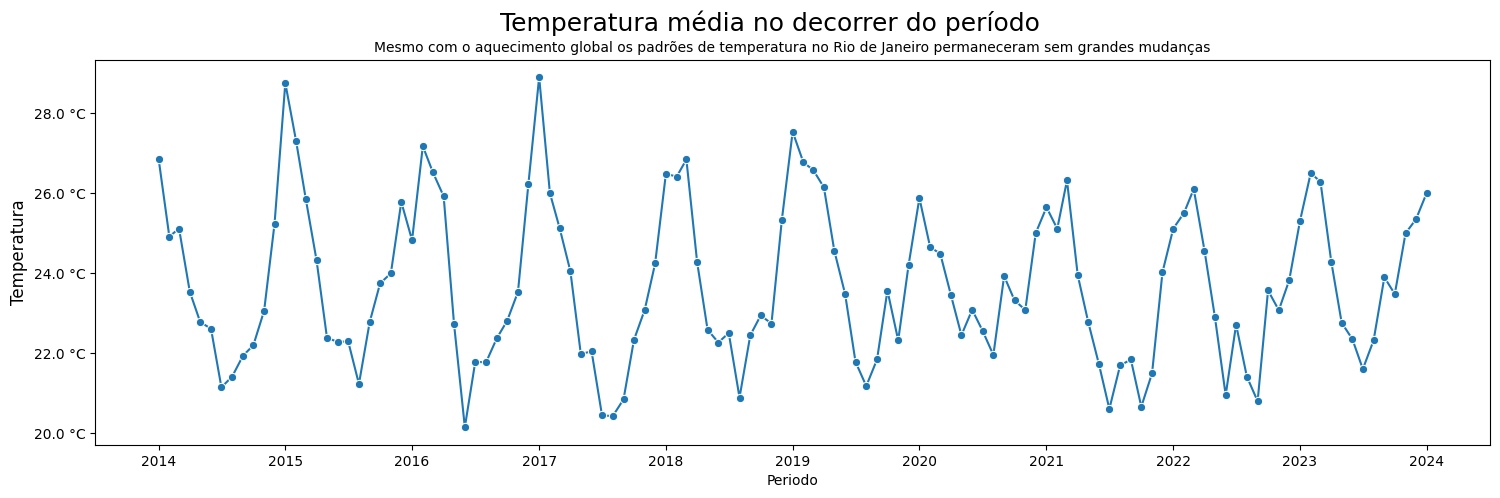

In [153]:
fig, ax = plt.subplots(figsize = (18, 5))
sns.lineplot(df_completo, x = 'Periodo', y = 'TEMPERATURA MEDIA, DIARIA (AUT)(°C)', marker = 'o', markersize = 6)
plt.suptitle('Temperatura média no decorrer do período', fontsize = 18);
plt.title('Mesmo com o aquecimento global os padrões de temperatura no Rio de Janeiro permaneceram sem grandes mudanças', fontsize = 10);
ax.yaxis.set_major_formatter('{x:1.1f} °C')
ax.set_ylabel('Temperatura', fontsize = 12);

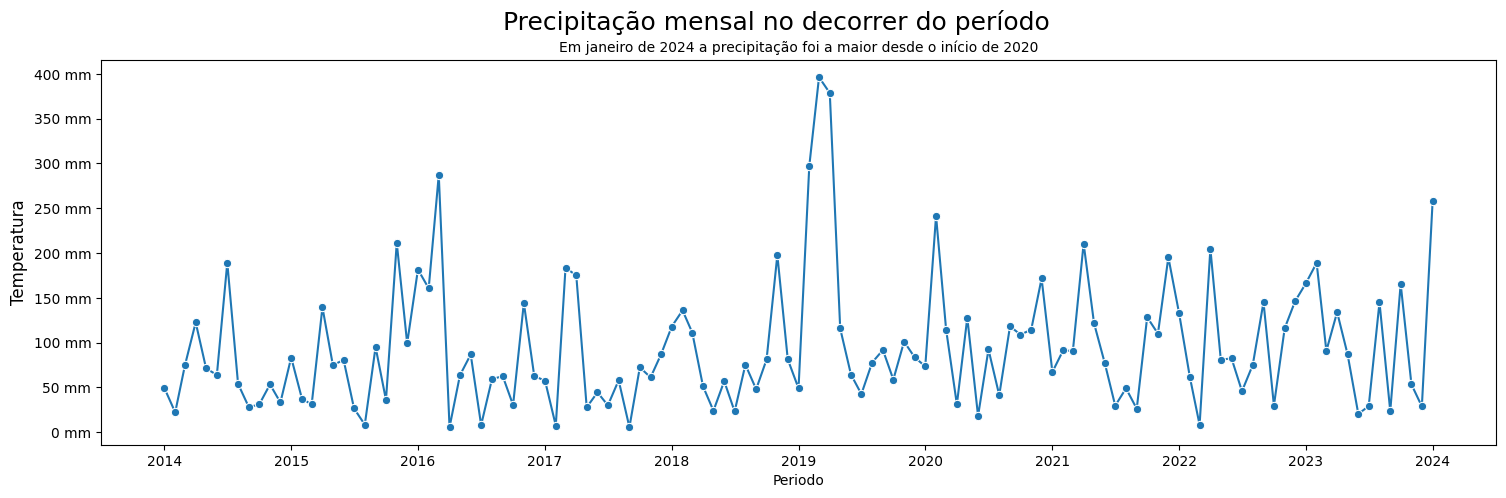

In [157]:
fig, ax = plt.subplots(figsize = (18, 5))
sns.lineplot(df_completo, x = 'Periodo', y = 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)', marker = 'o', markersize = 6)
plt.suptitle('Precipitação mensal no decorrer do período', fontsize = 18);
plt.title('Em janeiro de 2024 a precipitação foi a maior desde o início de 2020', fontsize = 10);
ax.yaxis.set_major_formatter('{x:1.0f} mm')
ax.set_ylabel('Temperatura', fontsize = 12);